In [38]:
# ---- Uncomment the following to run in colab, re-run this cell after installation -----
# try:
#   import decodanda
# except ImportError:
#   !pip install decodanda
#   print('\n\nInstalled Decodanda. Stopping RUNTIME. Colaboratory will restart automatically. Please run again.\n\n')
#   exit()


from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
np.random.seed(1)
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = 'w'
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from decodanda import Decodanda, generate_synthetic_data, plot_perfs_null_model


### Pseudo-population
Pooling from multiple data sets can be useful when individual ones have few neurons, or a low signal-to-noise ratio. Let's illustrate the point by generating a few data sets with low information


Decoding dataset #0
Decoding dataset #1
Decoding dataset #2
Decoding dataset #3


(0.38, 0.8)

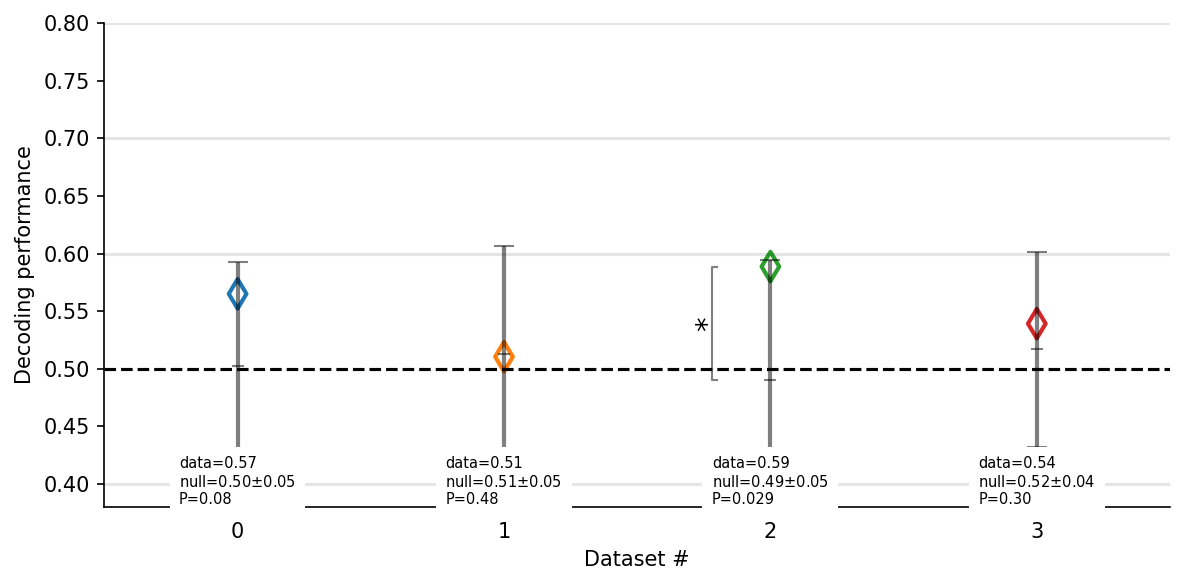

In [39]:
# Generating 4 data sets with low number of neurons (random between 5 and 10)
all_datasets = []
for i in range(4):
    n_neurons = 20
    dataset = generate_synthetic_data(n_neurons=n_neurons, n_trials=20, keyA='stimulus', rateA=0.05)
    all_datasets.append(dataset)
# Let's see how well they perform when decoded individually

results = {}
null_models = {}
for i, dataset in enumerate(all_datasets):
    print('Decoding dataset #%u' % i)
    res, null = Decodanda(data=dataset, conditions={'stimulus': [-1, 1]}).decode(training_fraction=0.75)
    results[i] = res['stimulus']
    null_models[i] = null['stimulus']

plot_perfs_null_model(results, null_models)
plt.xlabel('Dataset #')
plt.ylim([0.38, 0.7])

Pseudo-simultaneous data are automatically built when a list of sessions is specified instead of a single data set.
By pooling all neurons together, we can beat the null model much better than with individual sessions:


(0.38, 0.8)

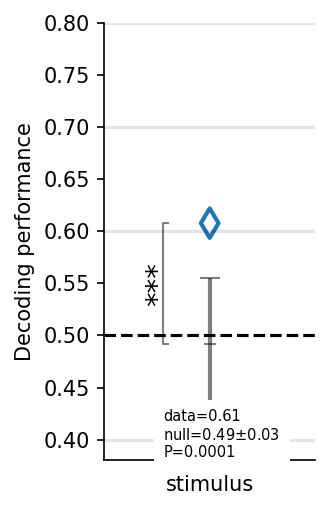

In [40]:
PSdec = Decodanda(data=all_datasets, conditions={'stimulus': [-1, 1]})
#                       ^list of dictionary

PSdec.decode(training_fraction=0.75, plot=True)
plt.ylim([0.38, 0.7])